In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

# Auto Insurance Claims

In [2]:
df=pd.read_csv('Auto_Insurance_Claims_amount.csv', parse_dates=['Effective To Date'])
df.head(5)

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor        2011-02-24         Employed  ...   
1  Bachelor        2011-01-31       Unemployed  ...   
2  Bachelor        2011-02-19         Employed  ...   
3  Bachelor        2011-01-20       Unemployed  ...   
4  Bachelor        2011-02-03         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [3]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inc

In [5]:
df.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

Observations:
1. Claim Amount has outliers. Min to 25% has a difference of 200, whereas, max to 75% has 7000+ difference.
2. There are many 0 income as at least 25% of the values are 0.
3. Months Since Policy Inception is normalized.
4. Majority of 'Number of Open Complaints' is 0.
5. Target 'Total Claim Amount' has outliers and is likely to be skewed.

In [6]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### Customer #######
count        9134
unique       9134
top       ZB85648
freq            1
Name: Customer, dtype: object
####### Country #######
['US']
####### State Code #######
['KS' 'NE' 'OK' 'MO' 'IA']
####### State #######
['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']
####### Claim Amount #######
count    9134.000000
mean      800.494047
std       687.096761
min       189.800768
25%       399.425179
50%       578.018220
75%       896.216704
max      8332.538119
Name: Claim Amount, dtype: float64
####### Response #######
['No' 'Yes']
####### Coverage #######
['Basic' 'Extended' 'Premium']
####### Education #######
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
####### Effective To Date #######
count                    9134
unique                     59
top       2011-01-10 00:00:00
freq                      195
first     2011-01-01 00:00:00
last      2011-02-28 00:00:00
Name: Effective To Date, dtype: object
####### EmploymentStatus #######
['Employed' '

Observations:
1. Customer has unique values and does not contribute to Total Claim Amount.
2. Country has only one value 'US' and can be dropped.
3. State Code and State is same > we can drop State Code.
4. Response can be converted to 0: No and 1: Yes.
5. Coverage > Basic, Extended and Premium > get_dummies.
6. Effective to Date > extract Month and date > drop year as it is 2011 > can apply OneHotEncoder here.
7. Gender can be converted to 0: Female and 1: Male.
8. Hypothesis > Education might not have an impact on Total Claim Amount.
9. Hypothesis > Marital Status might not have an impact on Total Claim Amount.
10. Hypothesis > It is likely that Married or Divorced has more number of claims.
11. Will need to relate Vehicle Class and Vehicle Size. It is likely to find correlation with Claim Amount.

In [7]:
df.drop(columns=['Customer', 'Country', 'State Code'], axis=1, inplace=True)

In [8]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64'):
        num_df.append(i)
    else: continue
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Number of Categorical Features :: 14
>>> Number of Numerical Features :: 8


Skewness of Claim Amount = 3.03
Skewness of Income = 0.29
Skewness of Monthly Premium Auto = 2.12
Skewness of Months Since Last Claim = 0.28
Skewness of Months Since Policy Inception = 0.04
Skewness of Number of Open Complaints = 2.78
Skewness of Number of Policies = 1.25
Skewness of Total Claim Amount = 1.71


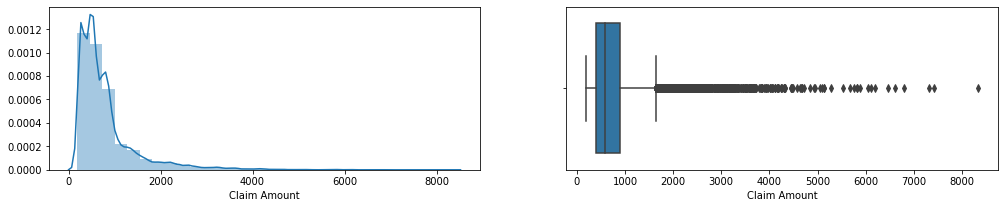

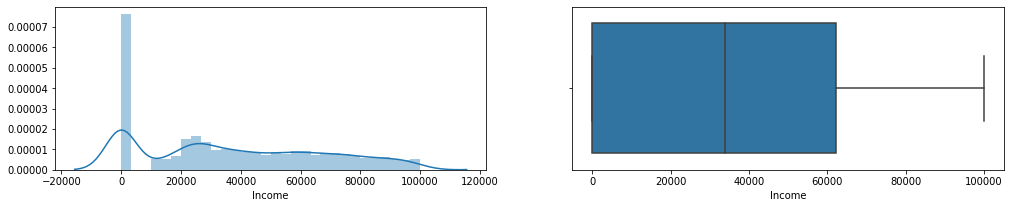

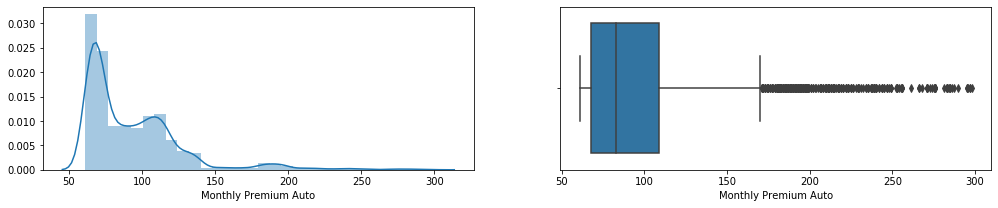

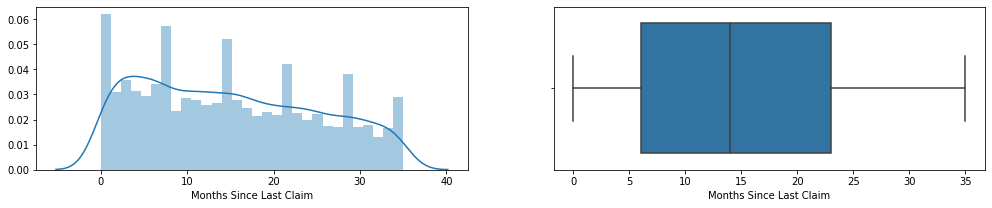

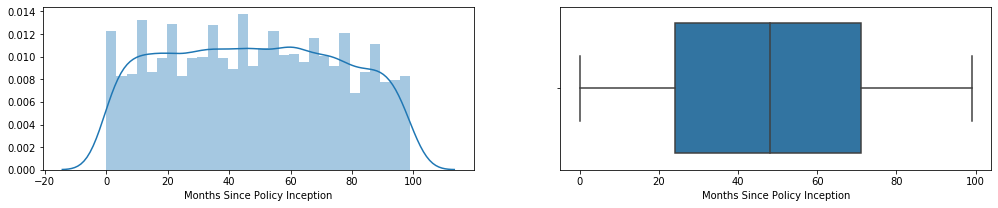

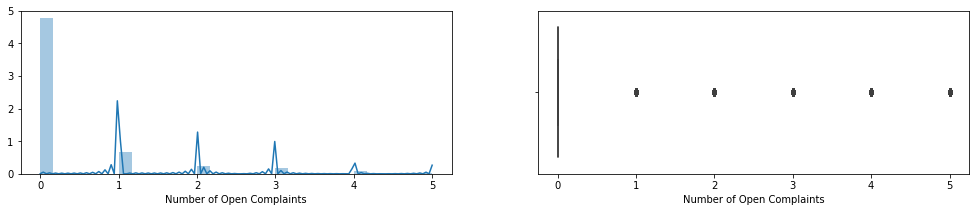

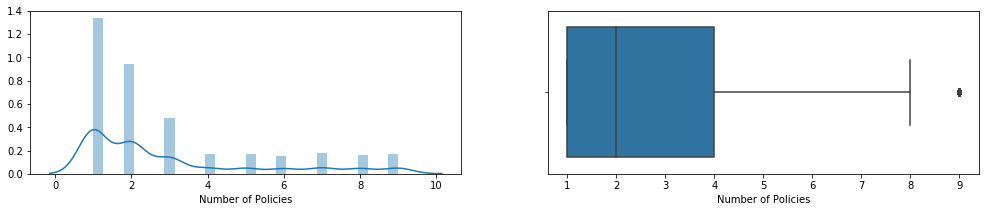

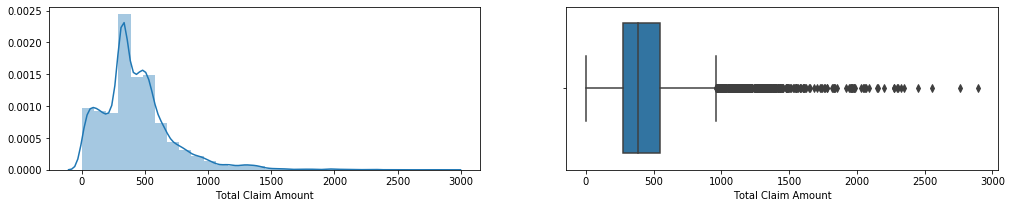

In [9]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

Let's create columns with log transformation of Claim Amount and Monthly Premium Auto.

In [10]:
# Removing Skewness > Log Transformation
dct={'Claim Amount': 'Log Claim Amount', 'Monthly Premium Auto': 'Log Premium'}
for i, j in dct.items():
    print('--- Log Transformation | %s ----' %(i))
    print('>> Skewness of %s is %0.2f' %(i, df[i].skew()))
    df[j]=boxcox(df[i],0)
    print('>> Skewness of %s is %0.2f' %(j, df[j].skew()))

--- Log Transformation | Claim Amount ----
>> Skewness of Claim Amount is 3.03
>> Skewness of Log Claim Amount is 0.58
--- Log Transformation | Monthly Premium Auto ----
>> Skewness of Monthly Premium Auto is 2.12
>> Skewness of Log Premium is 1.01


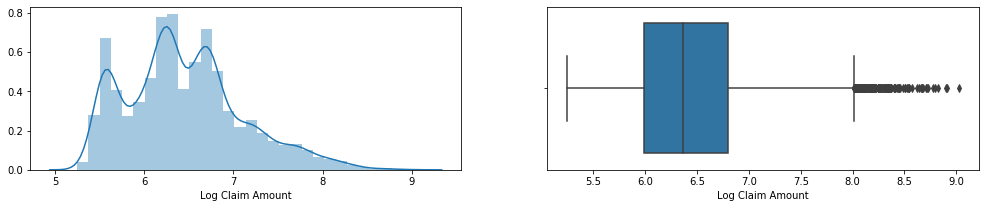

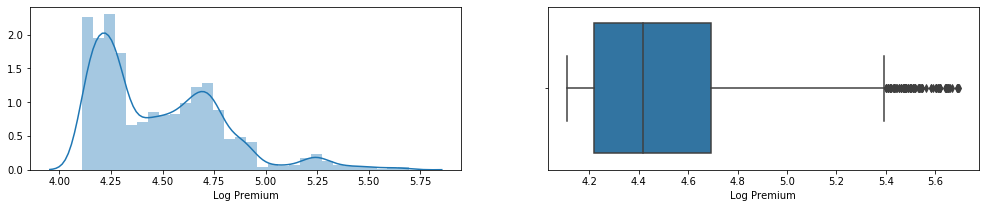

In [11]:
for i in dct.values():
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

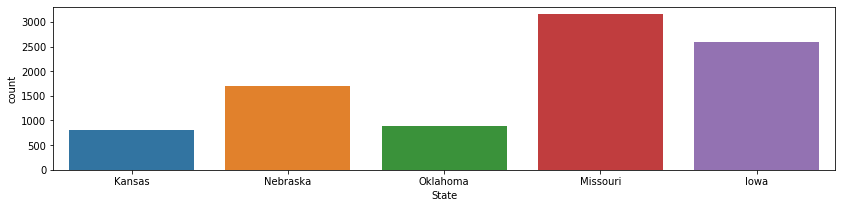

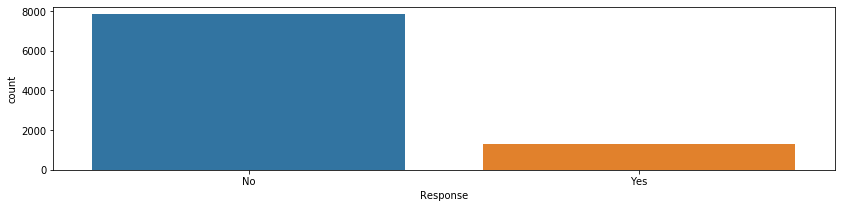

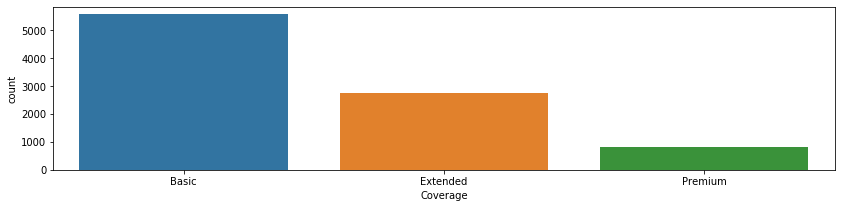

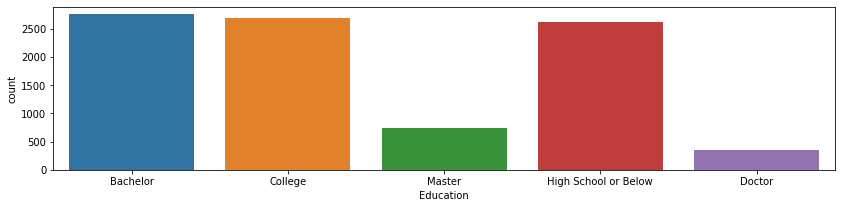

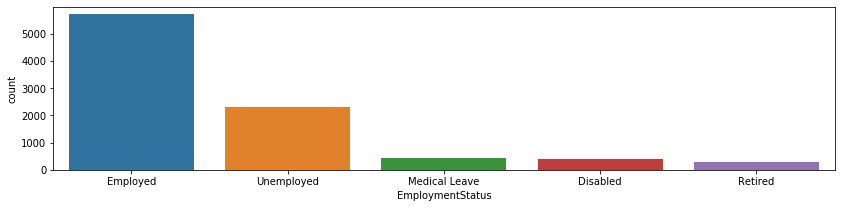

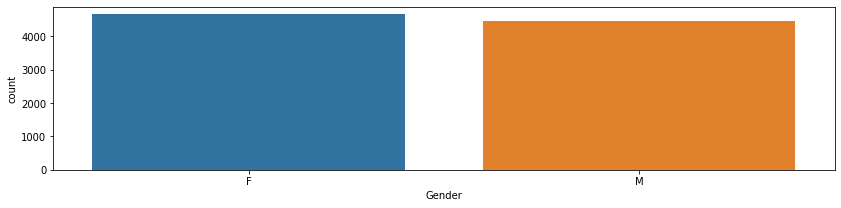

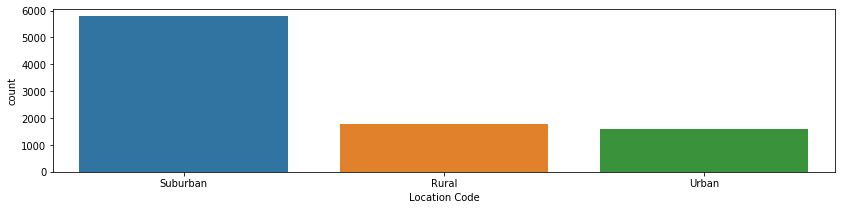

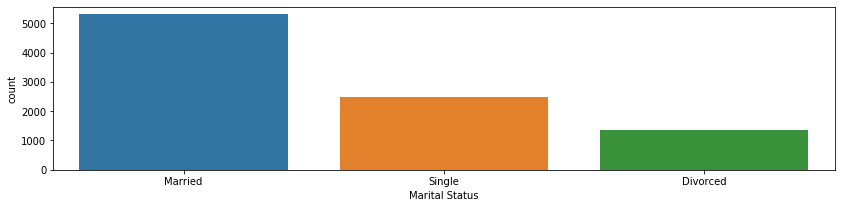

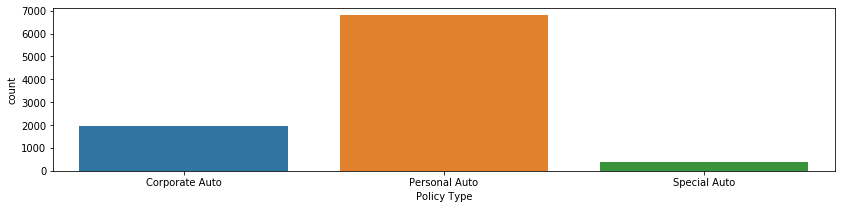

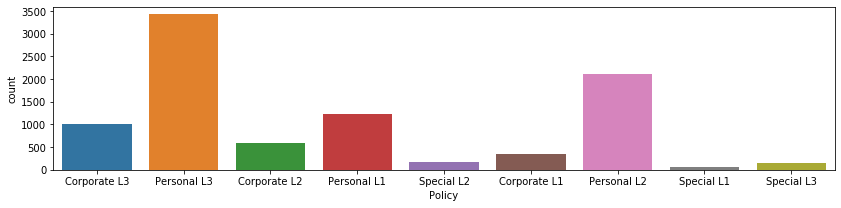

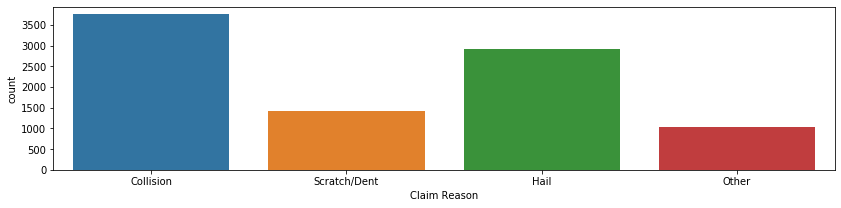

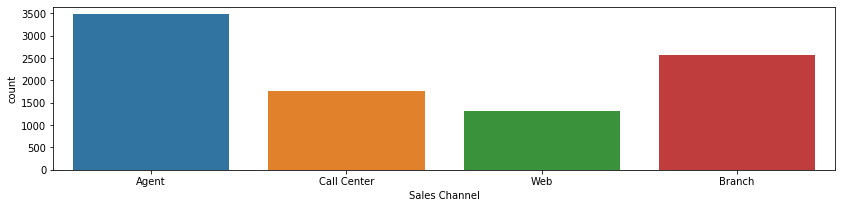

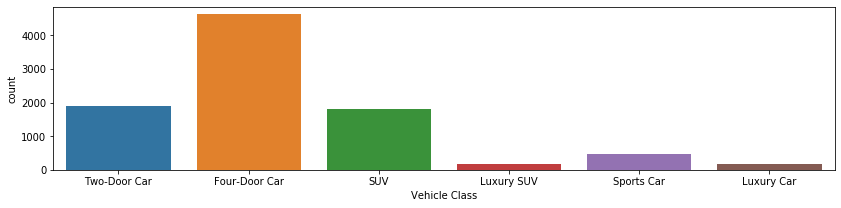

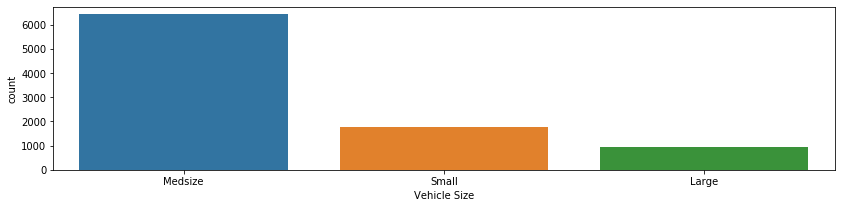

In [12]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(14,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

Observations:
1. Most data is from Missouri and Iowa, consisting about 2500 to 3000. We will compare it with Claim Reason.
2. Apart from Collision, 2nd highest Claim Reason is Hail.
3. Approximately, 80% of the customers have not claimed insurance.
4. Majority of the customers choose basic package.
5. Doctors don't prefer to take insurance.
7. Majority of the customers from Urban Location is likely to go for a better Policy Type.
8. Most of them prefer Personal Auto (Policy Type).

In [13]:
# Creating columns for day and month; No need of year as it is the same for all values
df['Month'], df['Day'] = 0, 0
for i, j in enumerate (df['Effective To Date']):
    df['Month'][i]=j.month
    df['Day'][i]=j.day
df['Month'].replace([1,2],['January', 'February'], inplace=True)

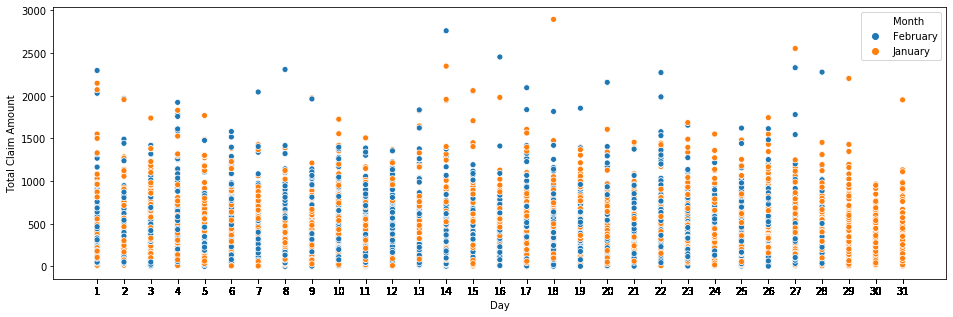

In [14]:
# Data Visualization using Month and Day
plt.figure(figsize=(16,5))
plt.xticks(df.Day.values)
sns.scatterplot(x='Day', y='Total Claim Amount', data=df, hue='Month')

In [15]:
df.drop(columns=['Effective To Date'], axis=1, inplace=True)

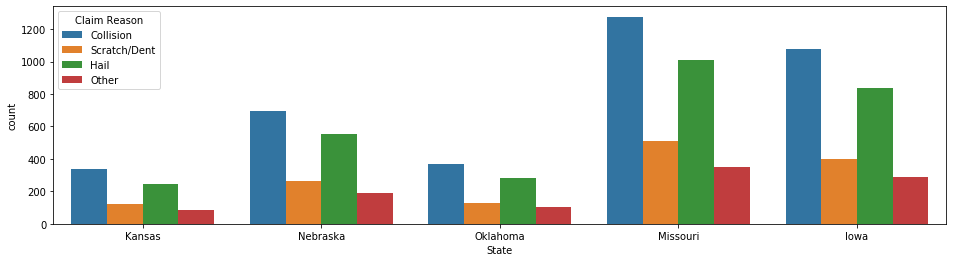

In [16]:
plt.figure(figsize=(16,4))
sns.countplot(x='State', data=df, hue='Claim Reason')

Majority of claim has been for Hail and Collision in Missouri and Iowa

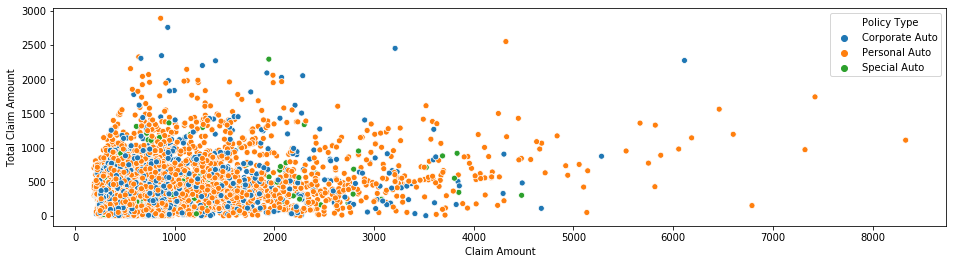

In [17]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Claim Amount', y='Total Claim Amount', data=df, hue='Policy Type')

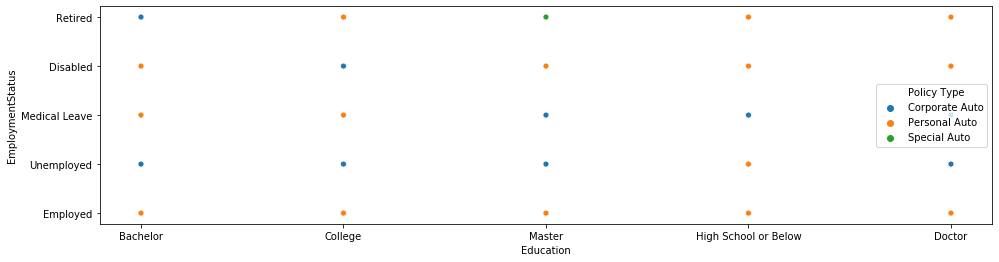

In [18]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Education', y='EmploymentStatus', data=df, hue='Policy Type')

1. Retired customers with Masters prefer 'Special Auto' Policy Type.
2. Majority of customers from 'High School or Above' prefer 'Personal Auto'.

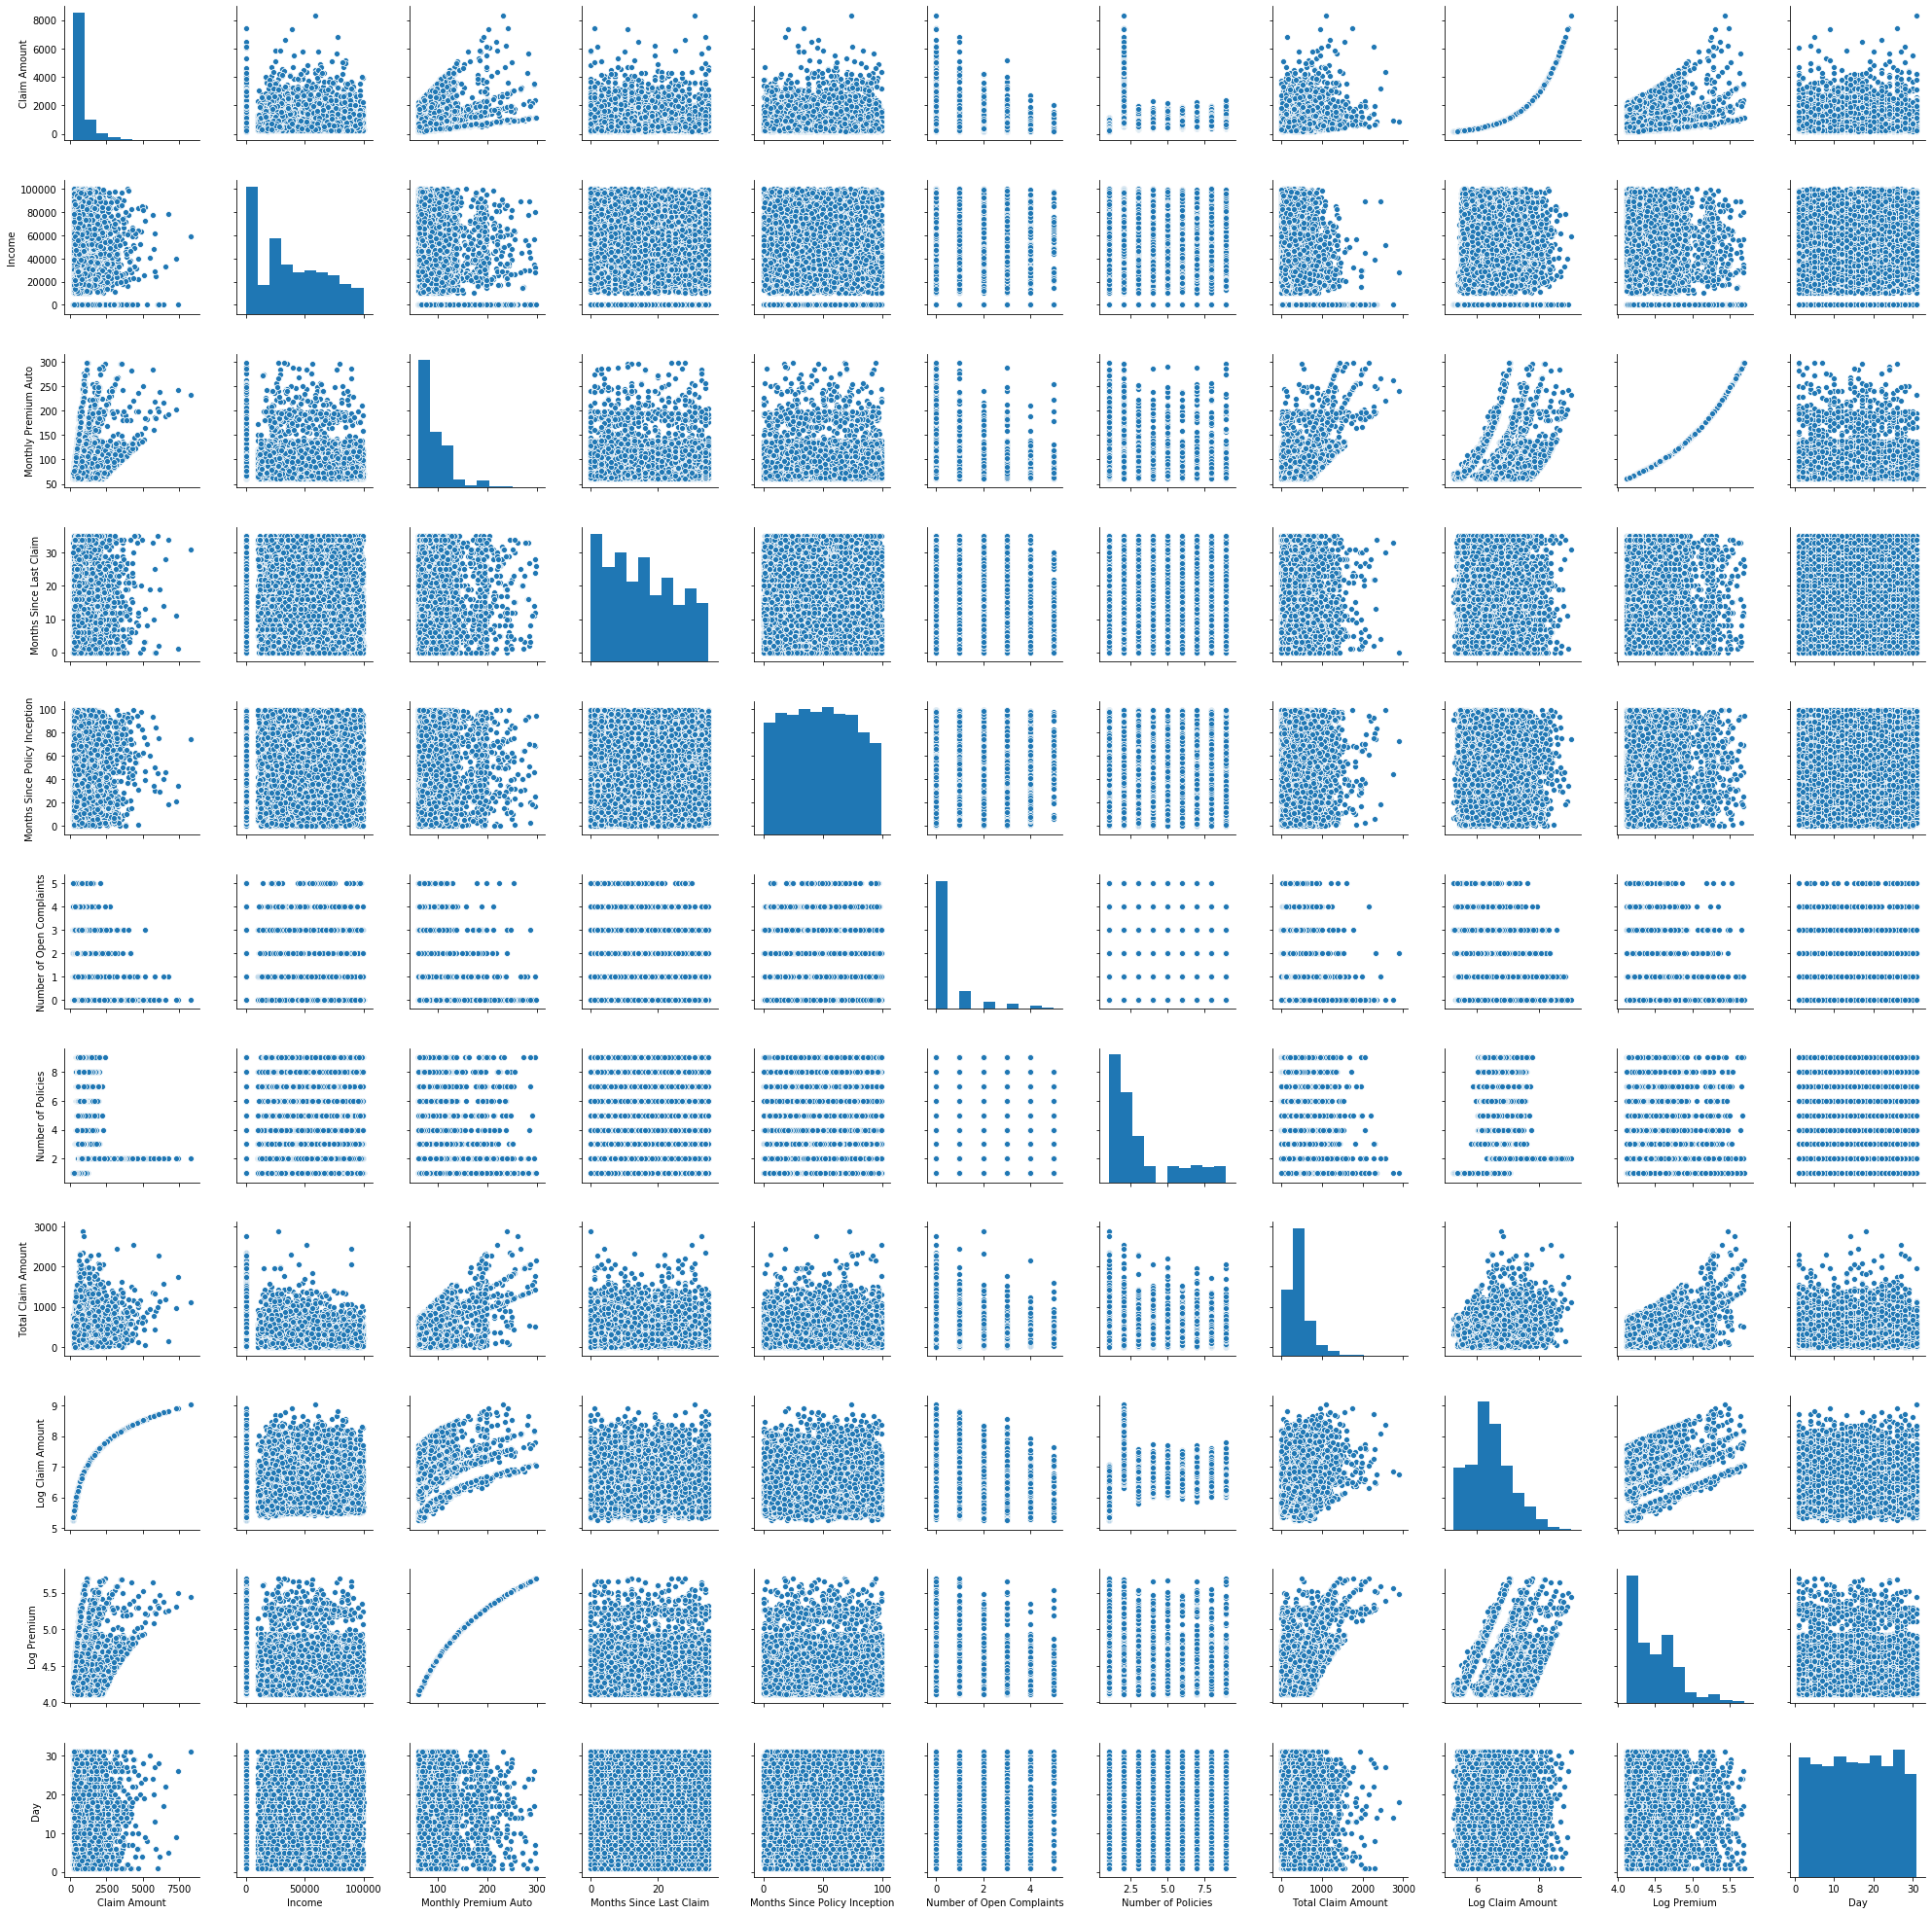

In [19]:
sns.pairplot(df)

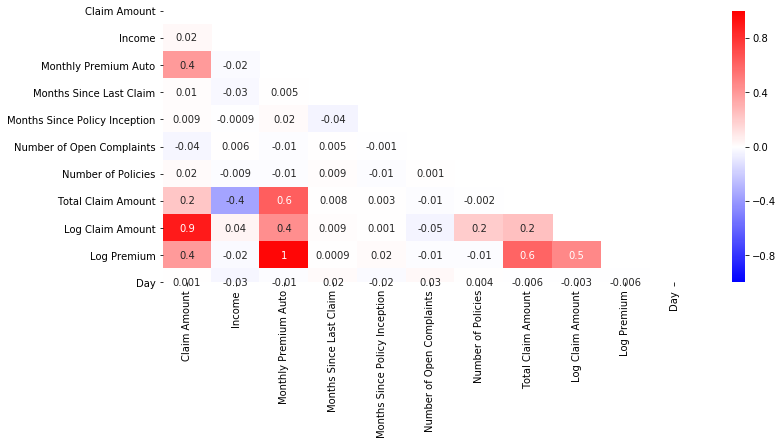

In [20]:
# colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

1. 'Income' is negatively correlated with 'Total Claim Amount'. Hypothesis > Customers with higher income require only less claim amount.
2. 'Months Since Last Claim', 'Number of Open Complaints' and 'Number of Policies' has no correlation with Total Claim Amount. We will drop them. 'Months Since Policy Inception' can be used instead of 'Month' and 'Day'.

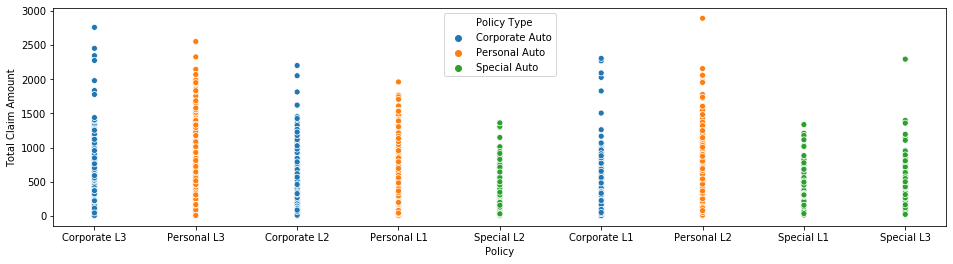

In [21]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Policy', y='Total Claim Amount', hue='Policy Type', data=df)

We don't need a further bifurcation for Policy as we have values spread across all 'Policy Type'. We can drop 'Policy'.

In [22]:
df.drop(columns=['Months Since Last Claim', 'Number of Open Complaints', 'Number of Policies', 'Month', 'Day', 'Policy'], axis=1, inplace=True)

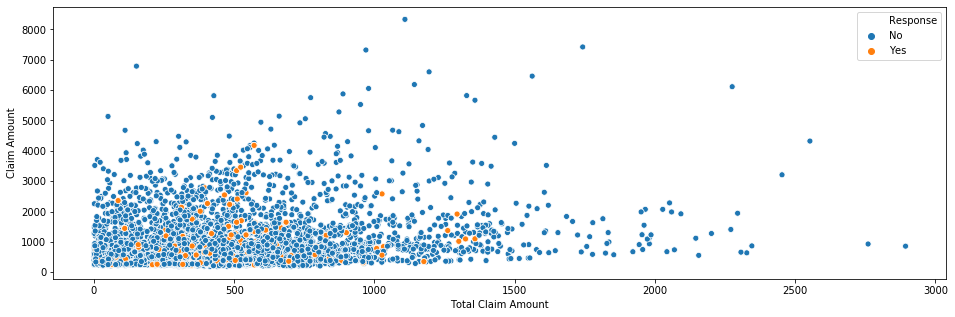

In [23]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Total Claim Amount', y='Claim Amount', data=df, hue='Response')

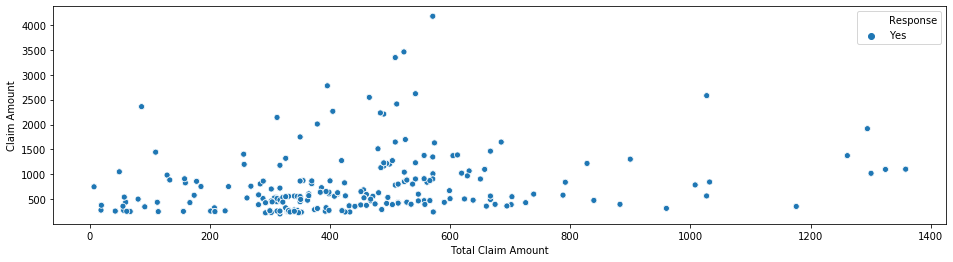

In [24]:
# filtering only 'Yes' from Response
res_yes=df[df['Response']=='Yes']
plt.figure(figsize=(16,4))
sns.scatterplot(x='Total Claim Amount', y='Claim Amount', data=res_yes, hue='Response')

In [25]:
df[df['Total Claim Amount']>df['Claim Amount']].head(5)

State  Claim Amount Response  Coverage             Education  \
0     Kansas    276.351928       No     Basic              Bachelor   
1   Nebraska    697.953590       No  Extended              Bachelor   
10  Missouri    473.899202       No     Basic               College   
16  Oklahoma    256.686782       No     Basic  High School or Below   
17  Missouri    394.524160       No     Basic               College   

   EmploymentStatus Gender  Income Location Code Marital Status  \
0          Employed      F   56274      Suburban        Married   
1        Unemployed      F       0      Suburban         Single   
10       Unemployed      M       0      Suburban         Single   
16    Medical Leave      M   25049      Suburban        Married   
17    Medical Leave      M   28855      Suburban        Married   

    Monthly Premium Auto  Months Since Policy Inception     Policy Type  \
0                     69                              5  Corporate Auto   
1                     94                             42   Personal Auto   
10                    67                              5   Personal Auto   
16                    67                              7   Personal Auto   
17                   101                             59   Personal Auto   

    Claim Reason Sales Channel  Total Claim Amount  Vehicle Class  \
0      Collision         Agent          384.811147   Two-Door Car   
1   Scratch/Dent         Agent         1131.464935  Four-Door Car   
10     Collision         Agent          482.400000  Four-Door Car   
16          Hail   Call Center          454.245098   Two-Door Car   
17  Scratch/Dent   Call Center          647.442031            SUV   

   Vehicle Size  Log Claim Amount  Log Premium  
0       Medsize          5.621675     4.234107  
1       Medsize          6.548153     4.543295  
10        Small          6.160995     4.204693  
16      Medsize          5.547857     4.204693  
17      Medsize          5.977680     4.615121

In [26]:
df['Response'].replace({'Yes':1, 'No':0}, inplace=True)
df['Gender'].replace({'F':0, 'M':1}, inplace=True)

In [27]:
df.drop(columns=['Claim Amount', 'Monthly Premium Auto'], axis=1, inplace=True)
df.shape

(9134, 18)

In [28]:
df=pd.get_dummies(df)
df.columns

Index(['Response', 'Gender', 'Income', 'Months Since Policy Inception',
       'Total Claim Amount', 'Log Claim Amount', 'Log Premium', 'State_Iowa',
       'State_Kansas', 'State_Missouri', 'State_Nebraska', 'State_Oklahoma',
       'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Location Code_Rural',
       'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Claim Reason_Collision', 'Claim Reason_Hail', 'Claim Reason_Other',
       'Claim Reason_Scratch/Dent', 'Sales Channel_Agent',
    

In [29]:
# We do not need additional columns for all categorical features. We will drop one column from each categorical feature.
df.drop(columns=['State_Kansas', 'Coverage_Premium', 'Education_Doctor', 'EmploymentStatus_Retired', 'Location Code_Urban', 'Marital Status_Divorced', 'Policy Type_Special Auto', 'Claim Reason_Other', 'Sales Channel_Web', 'Vehicle Class_Luxury SUV', 'Vehicle Size_Large'], axis=1, inplace=True)

In [30]:
# Splitting x and y from data
x=df.drop(columns=['Total Claim Amount'], axis=1)
y=df['Total Claim Amount']
print('Shape of x :: %s\nShape of y :: %s' %(x.shape, y.shape))

Shape of x :: (9134, 39)
Shape of y :: (9134,)


In [31]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [32]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(9134, 10)

In [33]:
pd.DataFrame(x)

0         1         2         3         4         5         6  \
0    -0.772072 -1.085780  2.612532  1.060771 -1.534507 -0.833268 -1.663291   
1     2.846060  0.023504  0.029520 -1.815665  2.427219 -0.355615 -0.216969   
2    -0.474015  1.395674 -0.255534 -0.651440 -1.003017 -0.964742 -1.488445   
3     2.106279  0.856710  2.673336  0.743635 -2.327258  0.250696  0.200372   
4    -0.699149 -1.638460  1.139170 -2.523630 -0.077812 -2.083802 -0.634711   
...        ...       ...       ...       ...       ...       ...       ...   
9129 -2.335112 -0.558661 -0.128091 -0.779051 -0.397088  0.182501 -0.520715   
9130  0.371042  0.101108  2.612978  0.876097  2.571729 -0.340731  0.327181   
9131  3.271575  0.245792  3.142416  0.215254  1.981301 -0.345232  1.348239   
9132 -0.462934  0.629906 -1.305412  0.430334  2.321107 -0.087382  2.182626   
9133  2.859268 -0.356216  2.472801  0.733766  1.368062  1.848718  1.324142   

             7         8         9  
0    -0.454998 -0.889903  0.949362  
1    -1.123126 -0.216386  1.335892  
2    -0.776125 -0.617880  1.281523  
3     1.214219  0.451611  2.451823  
4    -1.922792  0.636682  0.316118  
...        ...       ...       ...  
9129  0.440683  1.415029  1.461886  
9130  2.017228  0.400680 -0.793054  
9131  0.078016  0.618202  1.610118  
9132  1.814443  1.303491 -0.692916  
9133 -0.592216  0.519105  0.290227  

[9134 rows x 10 columns]

### Machine Learning Algorithms

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (7307, 10) | x_test.shape --> (1827, 10) 
y_train.shape --> (7307,) | y_test.shape --> (1827,)


In [35]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [36]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [37]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [38]:
score, rmse = [], []
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------------- Linear Regression -------------------
Accuracy Score :: 59.26
R2 Score: 0.5502347366373933
>>> Error >>>
Mean Absolute Error: 132.47424136883177
Mean Squared Error: 35761.30419149946
Root Mean Squared Error: 189.10659478584944
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 77.62
R2 Score: 0.6251801796110532
>>> Error >>>
Mean Absolute Error: 113.22659578741104
Mean Squared Error: 29802.31401980415
Root Mean Squared Error: 172.63346726461862
------------------- Ridge Regression -------------------
Accuracy Score :: 59.26
R2 Score: 0.5502373272708949
>>> Error >>>
Mean Absolute Error: 132.47197045798745
Mean Squared Error: 35761.0982075335
Root Mean Squared Error: 189.10605016110273
------------------- Lasso Regression -------------------
Accuracy Score :: 59.26
R2 Score: 0.5506145630196297
>>> Error >>>
Mean Absolute Error: 132.1924287942972
Mean Squared Error: 35731.10380053649
Root Mean Squared Error: 189.0267277411755
-------------

In [39]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T

Model Accuracy Score     RMSE
0          Linear Regression        59.2647  189.107
1      K-Neighbors Regressor        77.6182  172.633
2           Ridge Regression        59.2647  189.106
3           Lasso Regression        59.2582  189.027
4                Elastic Net        57.8676  190.356
5  Support Vector Regression        39.9901  219.076
6   Decision Tree Regression            100  214.256
7    Random Forest Regressor        96.3533  154.633

Conclusion:
    1. Ridge Regression and Lasso Regression did not improve the score from Linear Regression.
    2. As we can see, Decision Tree Regression is the best model for this dataset.

In [40]:
#Exporting model as pkl file
joblib.dump(dct,'dct_Auto_Insurance_Claims.pkl')

['dct_Auto_Insurance_Claims.pkl']

# Insurance Fraud Detection

In [460]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [461]:
df1=pd.read_csv('Automobile_insurance_fraud.csv', parse_dates=['policy_bind_date', 'incident_date'], index_col=0)
df1

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [462]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null datetime64[ns]
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_

In [463]:
print('>>>> # of unique values in df <<<<')
for i in df1:
    print(i, '--->', df1[i].nunique())

>>>> # of unique values in df <<<<
months_as_customer ---> 391
age ---> 46
policy_number ---> 1000
policy_bind_date ---> 951
policy_state ---> 3
policy_csl ---> 3
policy_deductable ---> 3
policy_annual_premium ---> 991
umbrella_limit ---> 11
insured_zip ---> 995
insured_sex ---> 2
insured_education_level ---> 7
insured_occupation ---> 14
insured_hobbies ---> 20
insured_relationship ---> 6
capital-gains ---> 338
capital-loss ---> 354
incident_date ---> 60
incident_type ---> 4
collision_type ---> 4
incident_severity ---> 4
authorities_contacted ---> 5
incident_state ---> 7
incident_city ---> 7
incident_location ---> 1000
incident_hour_of_the_day ---> 24
number_of_vehicles_involved ---> 4
property_damage ---> 3
bodily_injuries ---> 3
witnesses ---> 4
police_report_available ---> 3
total_claim_amount ---> 763
injury_claim ---> 638
property_claim ---> 626
vehicle_claim ---> 726
auto_make ---> 14
auto_model ---> 39
auto_year ---> 21
fraud_reported ---> 2


In [464]:
df1.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Observations:
1. months_as_customer min value is 0. There are customers who applied for policy right after joining.
2. policy_number and incident_location has unique 1000 unique values and can be dropped.
3. capital-gains has majority of 0 values.
4. auto_year is distributed in a span of 20 years.
5. Three types of claims - injury_claim, property_claim and vehicle_claim.
6. Minimum total_claim_amount is 100, whereas, individual minimum claims is 70.

In [465]:
for i in df1.columns:
    print('#######',i,'#######')
    if df1[i].nunique()>15:
        print(df1[i].describe())
    else:
        print(df1[i].unique())

####### months_as_customer #######
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64
####### age #######
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64
####### policy_number #######
count      1000.000000
mean     546238.648000
std      257063.005276
min      100804.000000
25%      335980.250000
50%      533135.000000
75%      759099.750000
max      999435.000000
Name: policy_number, dtype: float64
####### policy_bind_date #######
count                    1000
unique                    951
top       1992-05-08 00:00:00
freq                        3
first     1990-01-02 00:00:00
last      2015-03-01 00:00:00
Name: policy_bind_date, dtype: object
####### policy_state #######
['OH' 'IN' '

Observations:
1. insured_relationship can be dropped.
2. incident_date has the same year 2015, we can convert them into total number of days.
3. 'collision_type', 'property_damage' and 'police_report_available' has '?'.
4. incident_state isn't required as we have incident_city.
5. incident_location > we can see if we can extract any data and drop as it has unique values.
6. fraud_reported is our target values and can be converted into Y-1, N-0.

In [466]:
cat_df1, num_df1 = [], []
for i in df1:
    if df1[i].dtype=='O':
        cat_df1.append(i)
    elif (df1[i].dtypes=='int64') | (df1[i].dtypes=='float64'):
        num_df1.append(i)
    else: continue
print('>>> Number of Categorical Features ::', len(cat_df1))
print('>>> Number of Numerical Features ::', len(num_df1))

>>> Number of Categorical Features :: 19
>>> Number of Numerical Features :: 18


Skewness of months_as_customer = 0.36
Skewness of age = 0.48
Skewness of policy_number = 0.04
Skewness of policy_deductable = 0.48
Skewness of policy_annual_premium = 0.00
Skewness of umbrella_limit = 1.81
Skewness of insured_zip = 0.82
Skewness of capital-gains = 0.48
Skewness of capital-loss = -0.39
Skewness of incident_hour_of_the_day = -0.04
Skewness of number_of_vehicles_involved = 0.50
Skewness of bodily_injuries = 0.01
Skewness of witnesses = 0.02
Skewness of total_claim_amount = -0.59
Skewness of injury_claim = 0.26
Skewness of property_claim = 0.38
Skewness of vehicle_claim = -0.62
Skewness of auto_year = -0.05


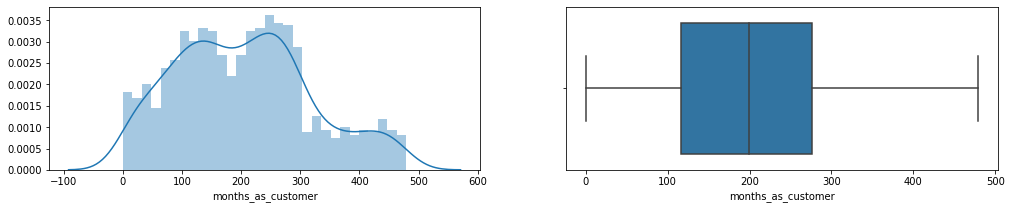

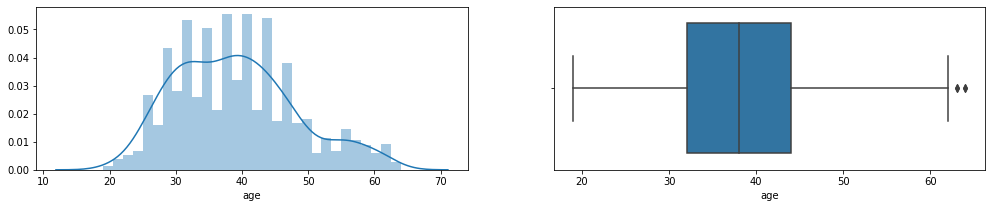

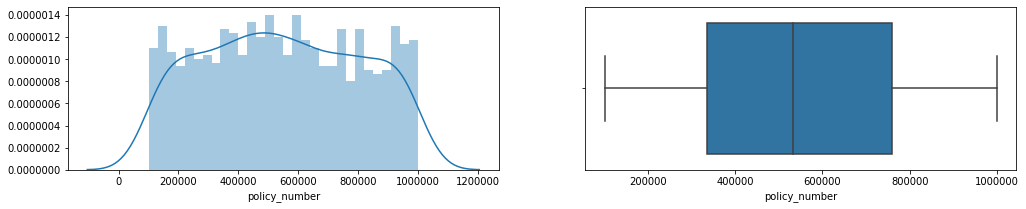

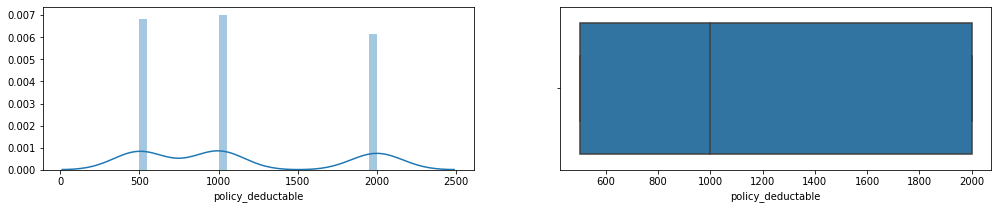

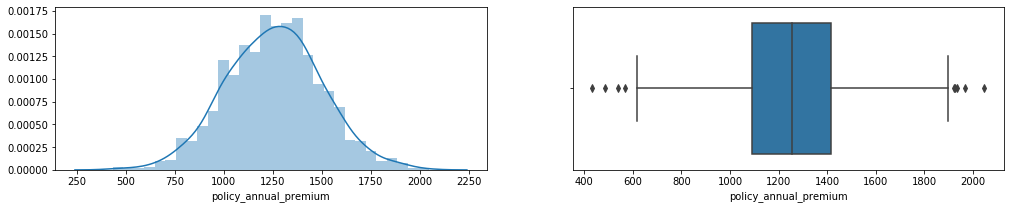

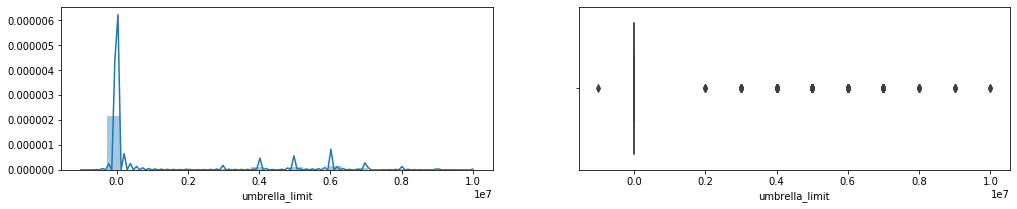

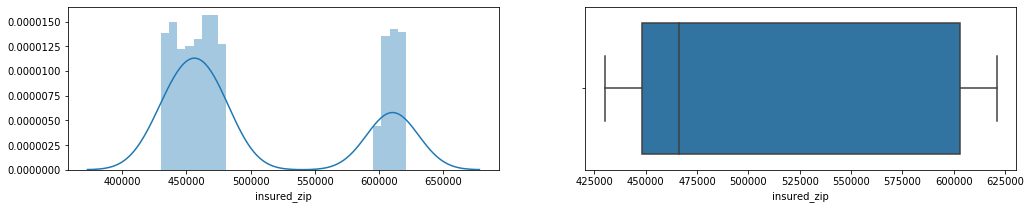

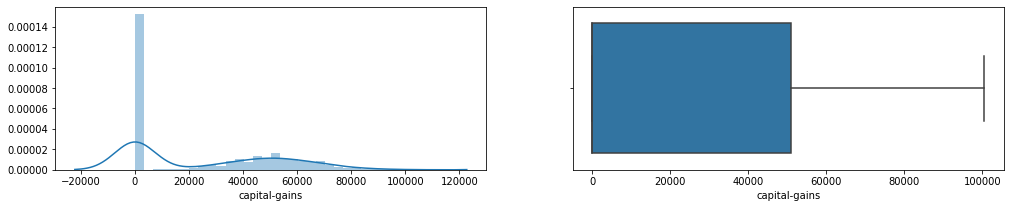

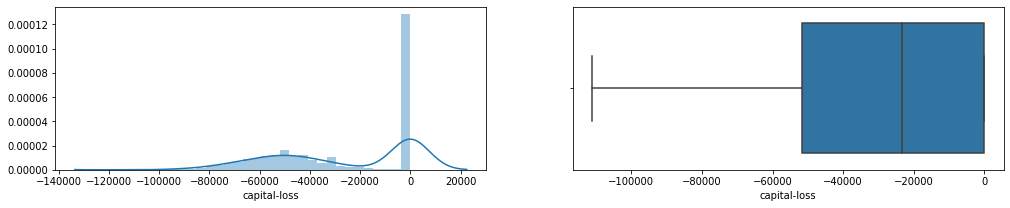

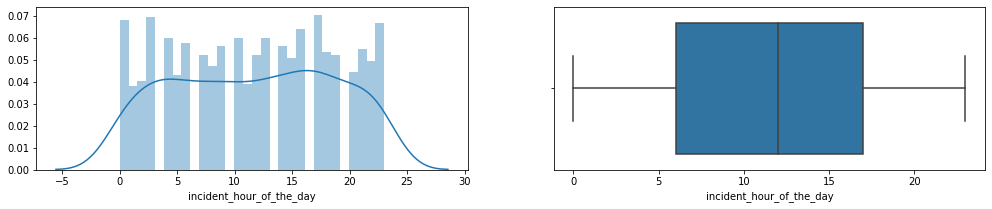

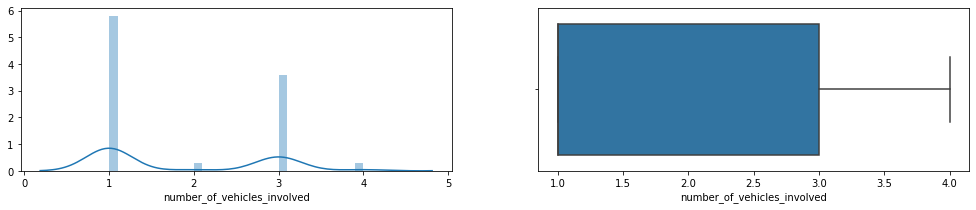

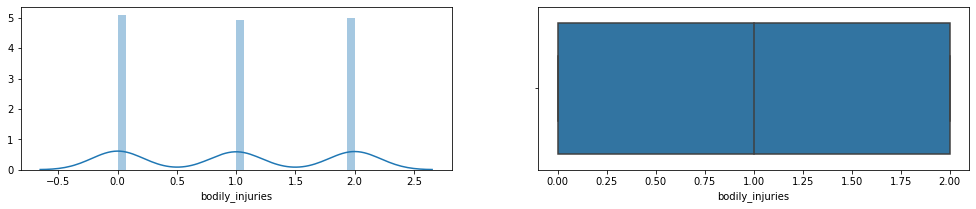

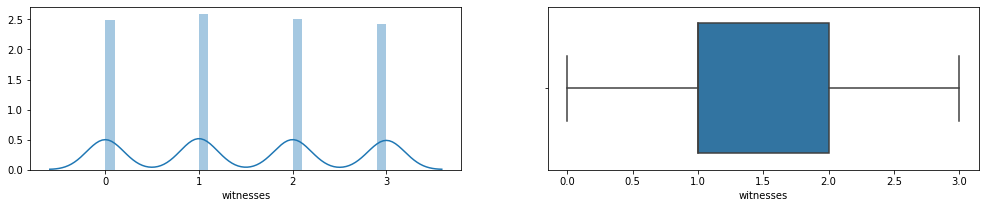

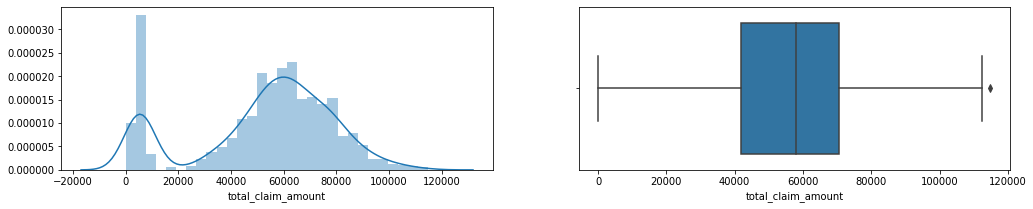

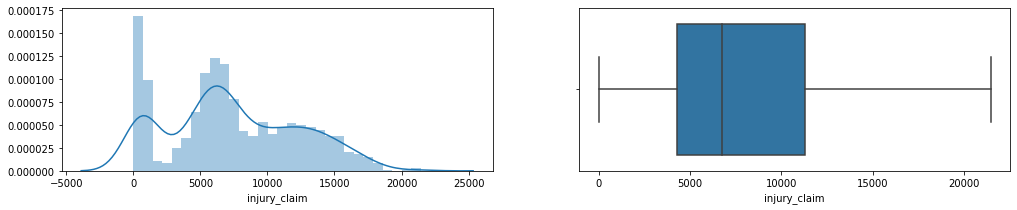

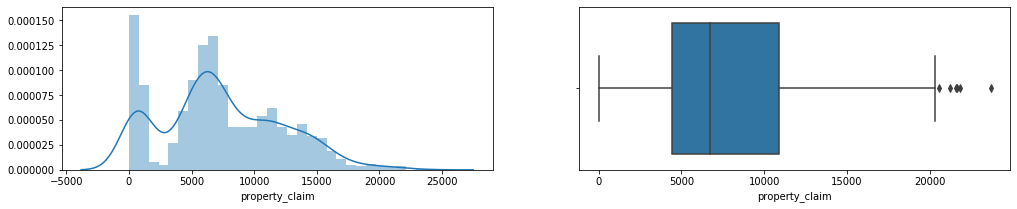

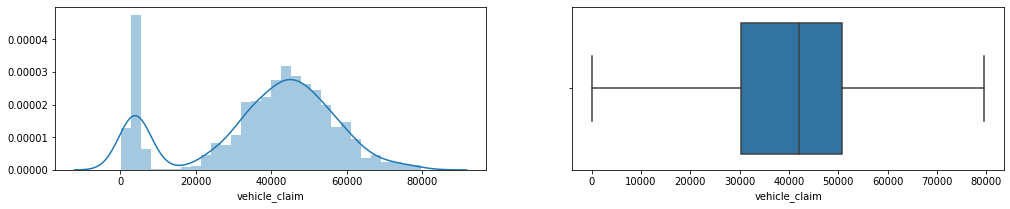

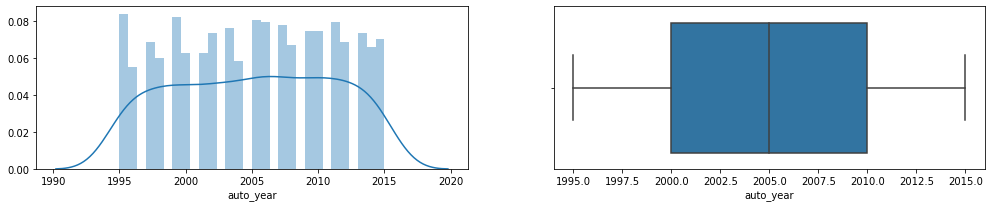

In [467]:
#Univariate analysis of numerical features
for i in num_df1:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df1[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df1[i])
    print('Skewness of %s = %0.2f' %(i, df1[i].skew()))

Observations:
1. total_claim_amount has many values below 20000. We can sort and see if we can remove unwanted data.
2. property_claim has outliers.
3. total_claim_amount has outliers
4. umbrella_limit is highly skewed with outliers
5. 'insured_zip', 'total_claim_amount' and 'vehicle_claim' is skewed.

In [468]:
df1['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [469]:
data = df1['incident_location'].str.split(' ', expand=True)
data[2].unique()

array(['Drive', 'Hwy', 'Lane', 'Ave', 'St', 'Ridge'], dtype=object)

In [470]:
# We can create a column to understand the exact location of the incident
data.columns=[0,1,'location']
data['location'].replace({'Hwy':'Highway', 'Ave':'Avenue', 'St':'Street'}, inplace=True)
df1 = pd.concat([df1,data], axis=1)
df1.drop(columns=[0,1,'incident_location'], inplace=True)
df1.head(3)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   

  fraud_reported location  
0              Y    Drive  
1              Y  Highway  
2              N     Lane  

[3 rows x 39 columns]

In [471]:
df1.drop(columns=['insured_relationship', 'incident_state', 'policy_number'], axis=1, inplace=True)
df1.shape

(1000, 36)

### Handling Missing Data

In [472]:
df1[(df1['collision_type']=='?') | (df1['property_damage']=='?') | (df1['police_report_available']=='?')]

months_as_customer  age policy_bind_date policy_state policy_csl  \
1                   228   42       2006-06-27           IN    250/500   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
6                   137   34       2000-04-06           IN    250/500   
7                   165   37       1990-03-02           IL    100/300   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
1                 2000                1197.22         5000000       468176   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
6                 1000                1333.35               0       441716   
7                 1000                1137.03               0       603195   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... police_report_available total_claim_amount injury_claim  \
1          MALE  ...                       ?               5070          780   
3        FEMALE  ...                      NO              63400         6340   
4          MALE  ...                      NO               6500         1300   
6          MALE  ...                       ?              78650        21450   
7          MALE  ...                     YES              51590         9380   
..          ...  ...                     ...                ...          ...   
995      FEMALE  ...                       ?              87200        17440   
996      FEMALE  ...                       ?             108480        18080   
997      FEMALE  ...                     YES              67500         7500   
998        MALE  ...                     YES              46980         5220   
999      FEMALE  ...                       ?               5060          460   

     property_claim  vehicle_claim   auto_make  auto_model auto_year  \
1               780           3510    Mercedes        E400      2007   
3              6340          50720   Chevrolet       Tahoe      2014   
4               650           4550      Accura         RSX      2009   
6              7150          50050      Nissan  Pathfinder      2012   
7              9380          32830        Audi          A5      2015   
..              ...            ...         ...         ...       ...   
995            8720          61040       Honda      Accord      2006   
996           18080          72320  Volkswagen      Passat      2015   
997            7500          52500      Suburu     Impreza      1996   
998            5220          36540        Audi          A5      1998   
999             920           3680    Mercedes        E400      2007   

    fraud_reported location  
1                Y  Highway  
3                Y    Drive  
4                N   Avenue  
6                N    Drive  
7                N  Highway  
..             ...      ...  
995              N   Street  
996              N    Drive  
997              N   Street  
998              N     Lane  
999              N    Ridge  

[660

In [473]:
for i in ['collision_type', 'property_damage', 'police_report_available']:
    print('****',i,'****')
    print(df1[i].value_counts())

**** collision_type ****
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
**** property_damage ****
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
**** police_report_available ****
NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


1. For 'property_damage' and 'police_report_available', we can assign 'NO' for missing values.
2. Since we cannot replace any values for missing data in 'collision_type', we will drop these rows rather than creating another category.

In [474]:
df1 = df1[df1['collision_type']!='?']
df1.shape

(822, 36)

In [475]:
# Re-indexing to avoid any future issues
df1.index = range(0,822)

In [476]:
df1['property_damage'].replace({'?':'NO'}, inplace=True)
df1['police_report_available'].replace({'?':'NO'}, inplace=True)

for i in ['property_damage', 'police_report_available']:
    print('****',i,'****')
    print(df1[i].value_counts())

**** property_damage ****
NO     570
YES    252
Name: property_damage, dtype: int64
**** police_report_available ****
NO     558
YES    264
Name: police_report_available, dtype: int64


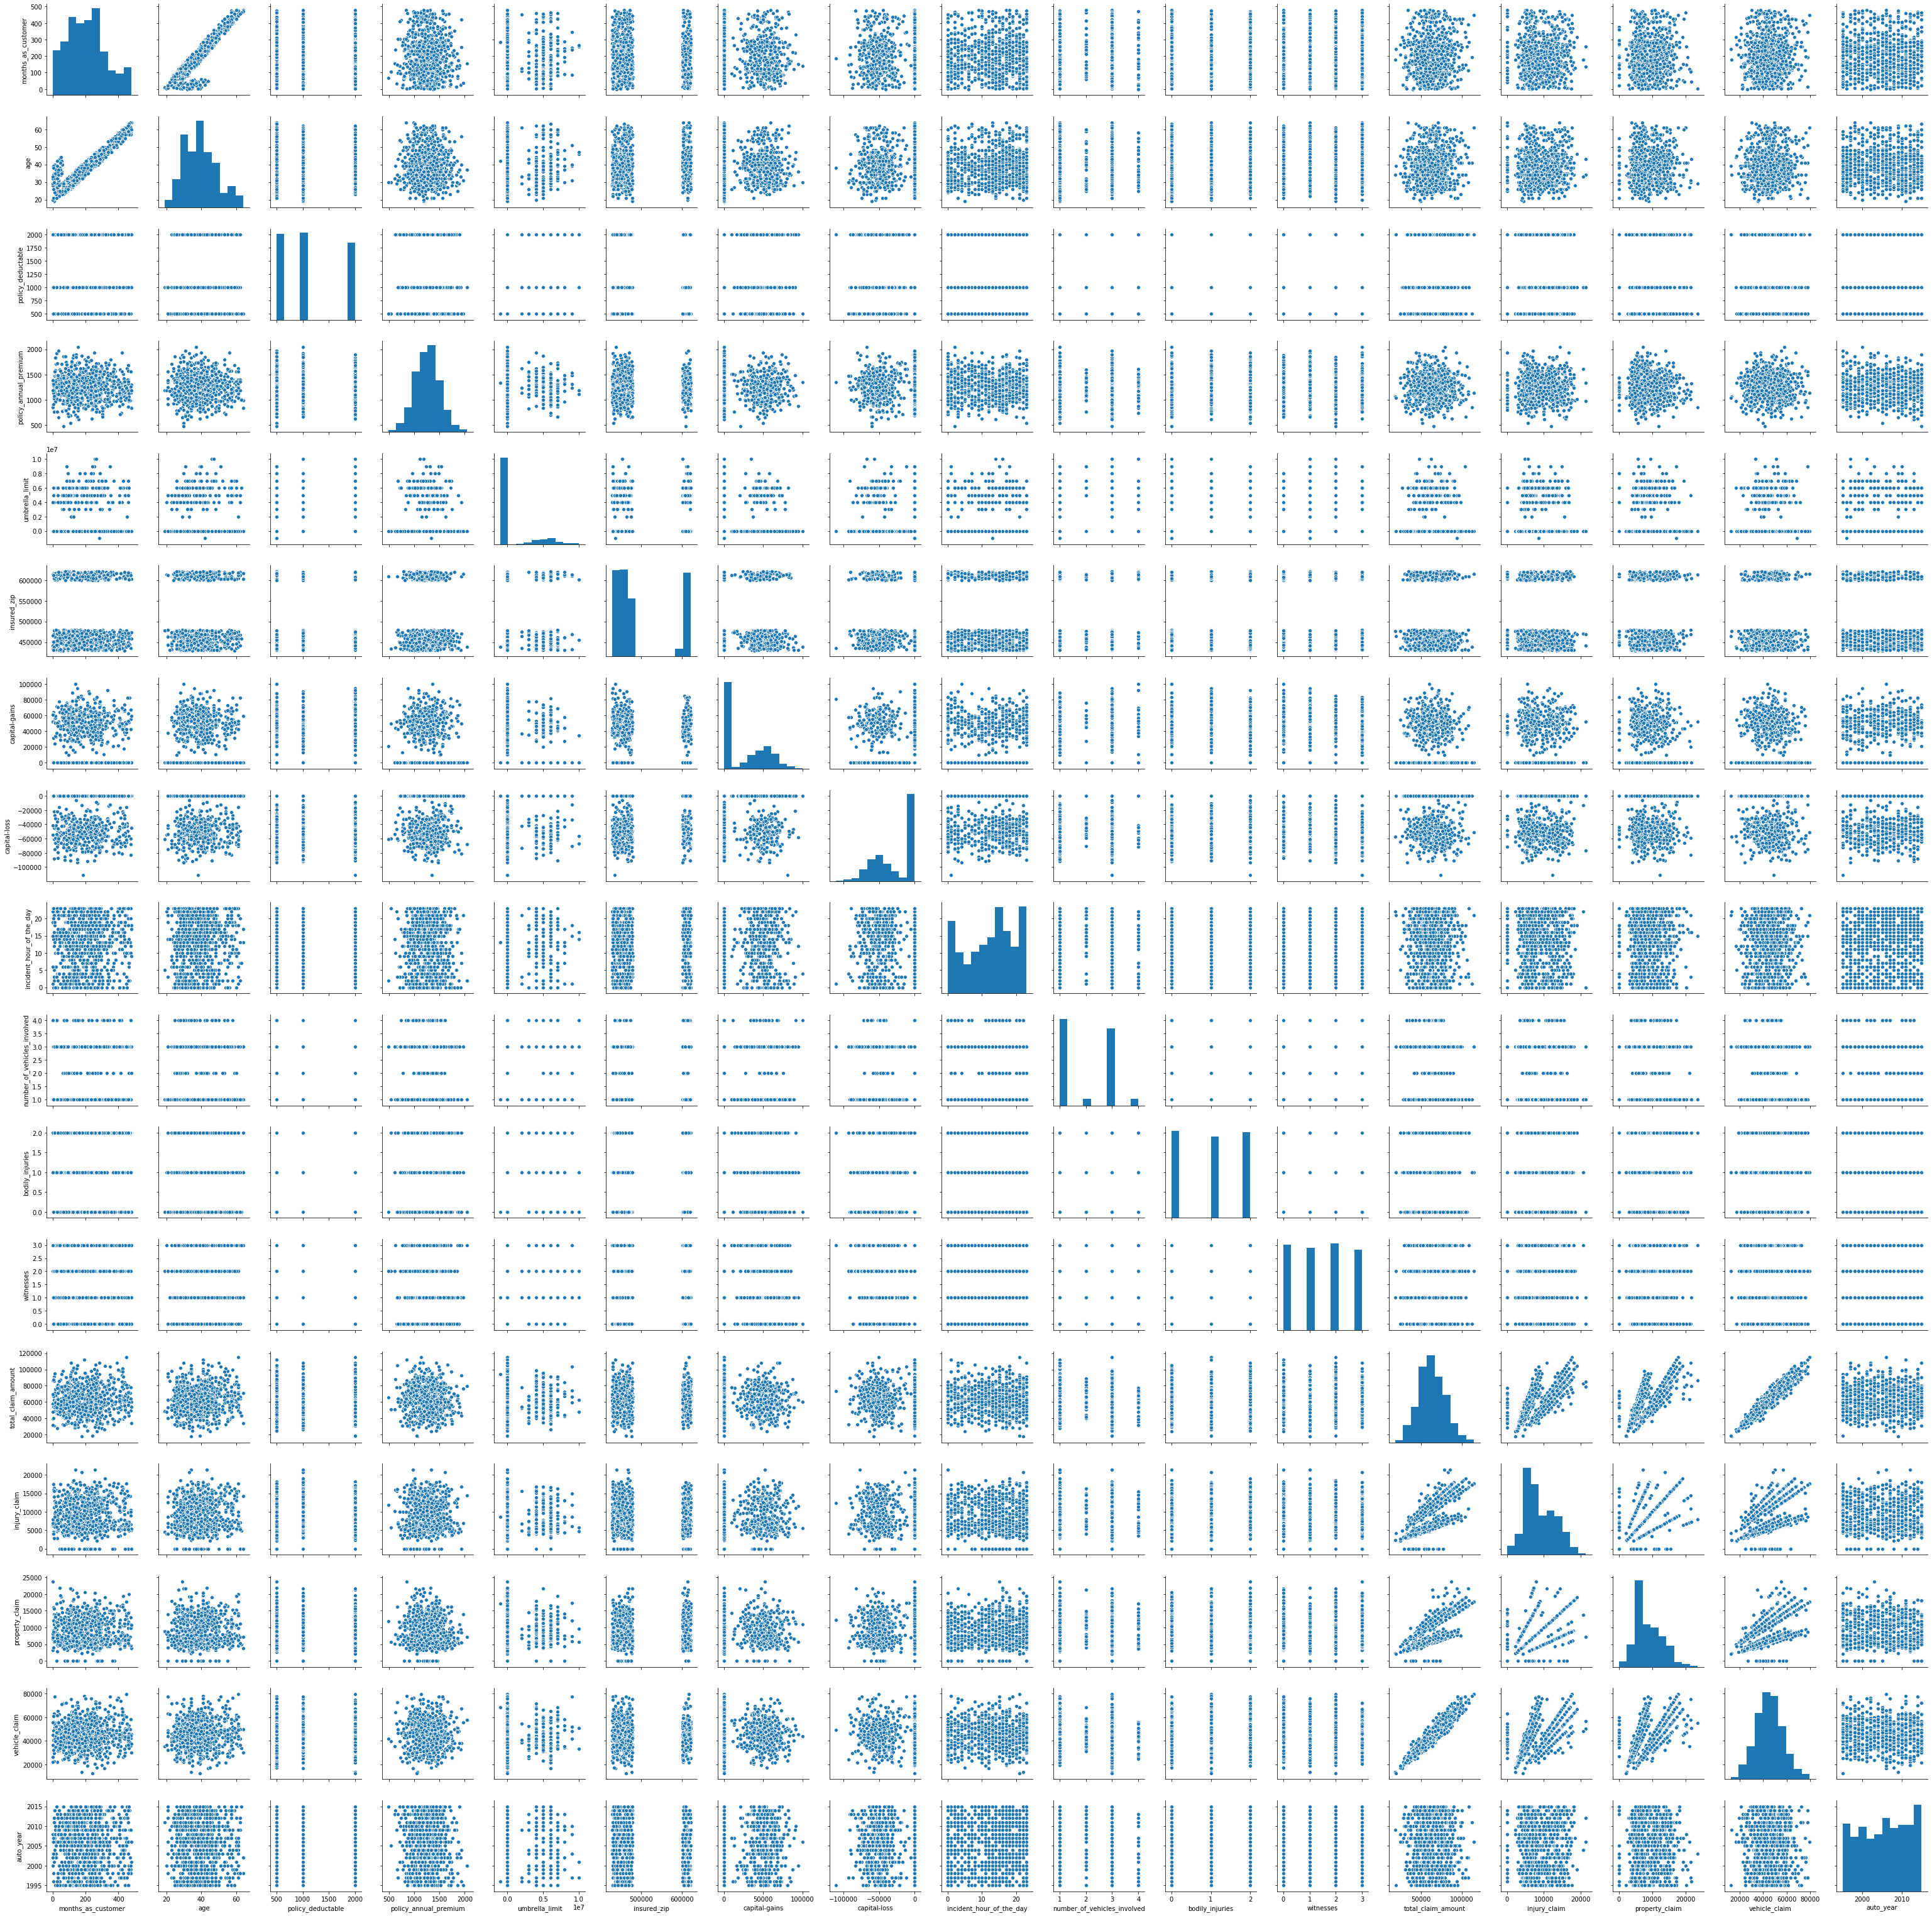

In [477]:
sns.pairplot(df1)

In [478]:
# Let's convert 'incident_date' to 'incident_day' and 'incident_month'
df1['incident_month'], df1['incident_day'] = 0, 0
for i, j in enumerate(df1['incident_date']):
    df1['incident_month'][i] = j.month
    df1['incident_day'][i] = j.day
pd.DataFrame([df1['incident_month'], df1['incident_day']]).T

incident_month  incident_day
0                 1            25
1                 2            22
2                10             1
3                 2             1
4                 1            13
..              ...           ...
817               2            17
818               2            22
819               1            24
820               1            23
821               2            26

[822 rows x 2 columns]

In [479]:
print('>> Skewness of %s is %0.2f' %('incident_day', df1['incident_day'].skew()))
print('>> Skewness of %s is %0.2f' %('incident_month', df1['incident_month'].skew()))

>> Skewness of incident_day is 0.09
>> Skewness of incident_month is 1.28


In [480]:
print('>> Skewness of %s before log10 is %0.2f' %('incident_month', df1['incident_month'].skew()))
df1['Log_incident_month']=np.log10(df1['incident_month'])
print('>> Skewness of %s after log10 is %0.2f' %('Log_incident_month', df1['Log_incident_month'].skew()))
df1.drop(columns=['incident_month'], axis=1, inplace=True) #Drop 'incident_month'

>> Skewness of incident_month before log10 is 1.28
>> Skewness of Log_incident_month after log10 is 0.59


In [481]:
# Similarily, let's convert 'policy_bind_date' to 'policy_bind_day' and 'policy_bind_month'
df1['policy_bind_month'], df1['policy_bind_day'] = 0, 0
for i, j in enumerate(df1['policy_bind_date']):
    df1['policy_bind_month'][i] = j.month
    df1['policy_bind_day'][i] = j.day
pd.DataFrame([df1['policy_bind_month'], df1['policy_bind_day']]).T

policy_bind_month  policy_bind_day
0                   10               17
1                    6                9
2                    5               25
3                   12               10
4                    4                6
..                 ...              ...
817                  8               12
818                  7               16
819                  5                1
820                  2               17
821                 11               18

[822 rows x 2 columns]

In [482]:
print('>> Skewness of %s is %0.2f' %('policy_bind_day', df1['policy_bind_day'].skew()))
print('>> Skewness of %s is %0.2f' %('policy_bind_month', df1['policy_bind_month'].skew()))

>> Skewness of policy_bind_day is 0.02
>> Skewness of policy_bind_month is -0.05


In [483]:
# Drop 'incident_date' and 'policy_bind_date'
df1.drop(columns=['incident_date', 'policy_bind_date'], axis=1, inplace=True)

### Data Visualization

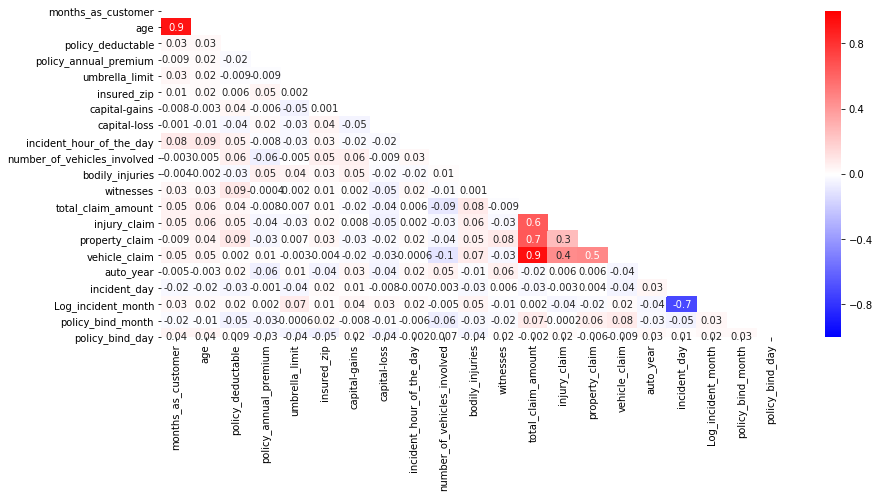

In [484]:
plt.figure(figsize=(14,6))
sns.heatmap(df1.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g', cmap='bwr', mask=np.triu(df1.corr()))

1. total_claim_amount is highly and positively correlated with injury_claim, property_claim and vehicle_claim.
2. Additonally, vehicle_claim is highly correlated with injury_claim and property-claim.
> Based on the observations, we can drop vehicle_claim as it is highly correlated with 3 features. Also, we can drop property_claim which is next highly correlated feature.
3. Age and months_as_customer is very highly correlated.
> Due to high correlation, we can drop months_as_customer and retain age.

In [485]:
df1.drop(columns=['vehicle_claim', 'property_claim', 'months_as_customer'], axis=1, inplace=True)
df1.shape

(822, 35)

In [486]:
df1['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)

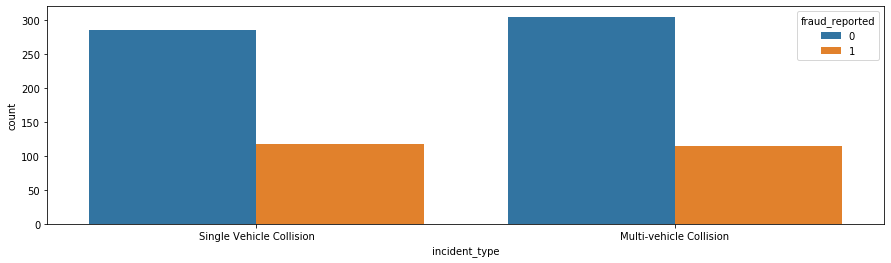

In [487]:
plt.figure(figsize=(15,4))
sns.countplot(x='incident_type', data=df1,hue='fraud_reported')

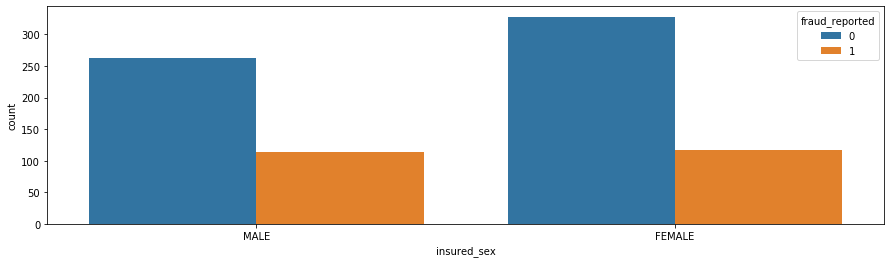

In [488]:
plt.figure(figsize=(15,4))
sns.countplot(x='insured_sex', data=df1,hue='fraud_reported')

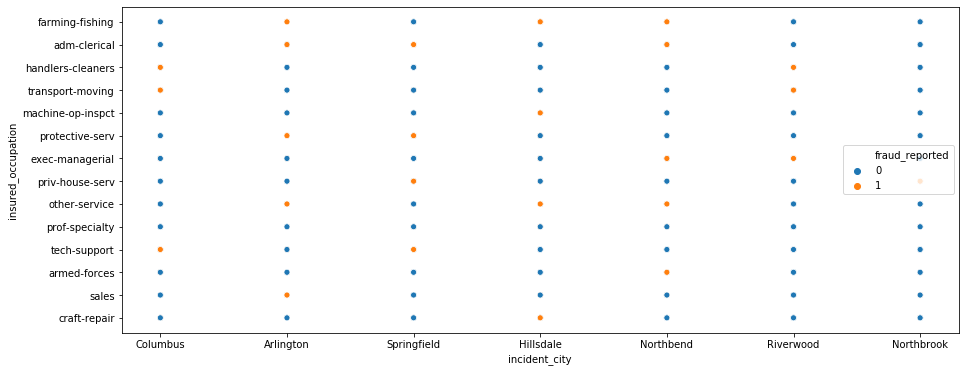

In [489]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='insured_occupation',hue='fraud_reported',data=df1)

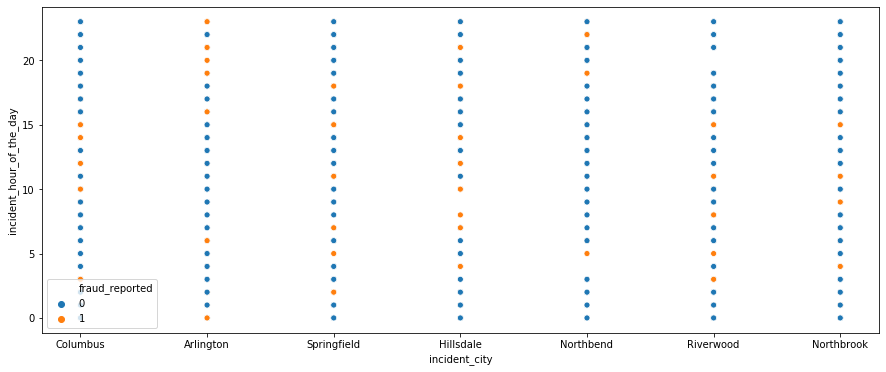

In [490]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='incident_city',y='incident_hour_of_the_day',hue='fraud_reported',data=df1)

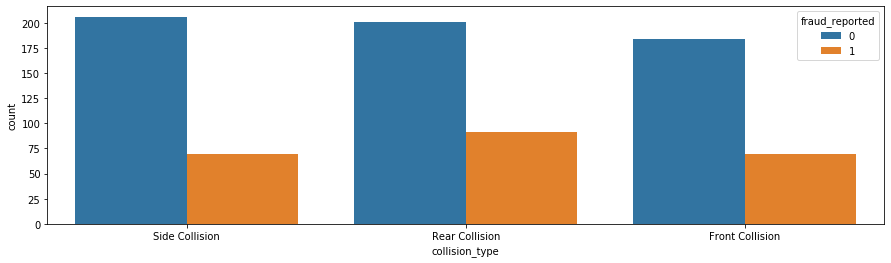

In [491]:
plt.figure(figsize=(15,4))
sns.countplot(x='collision_type', data=df1,hue='fraud_reported')

Text(0, 0.5, '% of Reports')

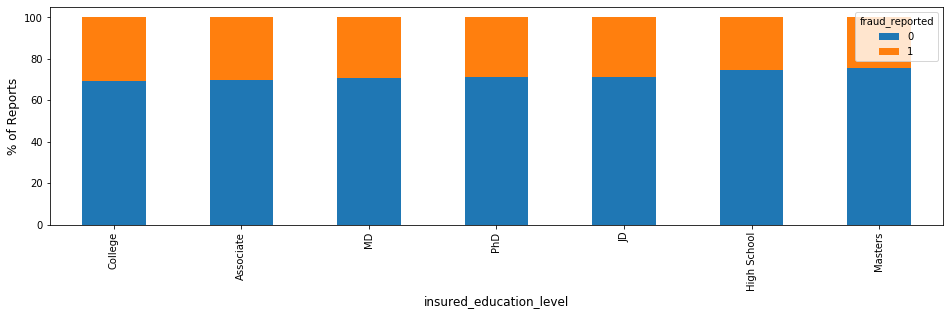

In [492]:
tbl=pd.crosstab(df1['insured_education_level'], df1['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('insured_education_level',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

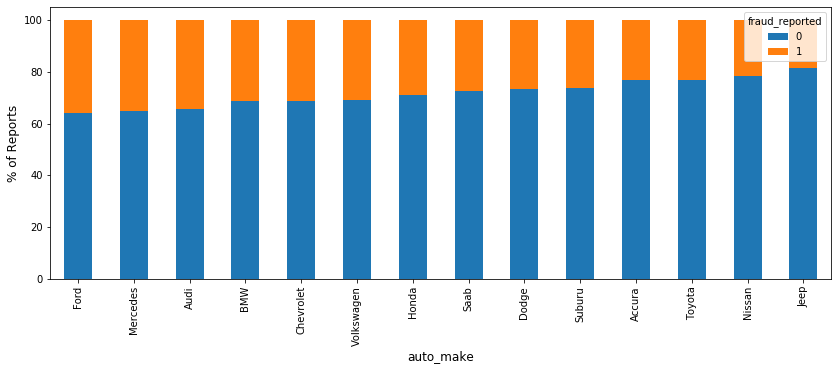

In [493]:
tbl=pd.crosstab(df1['auto_make'], df1['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('auto_make',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

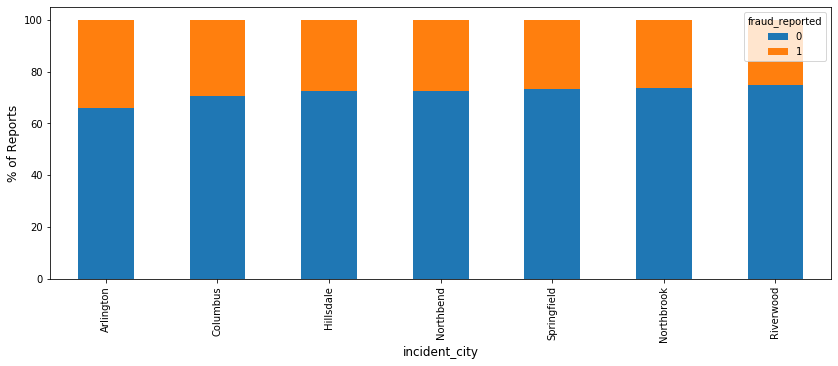

In [494]:
tbl=pd.crosstab(df1['incident_city'], df1['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('incident_city',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

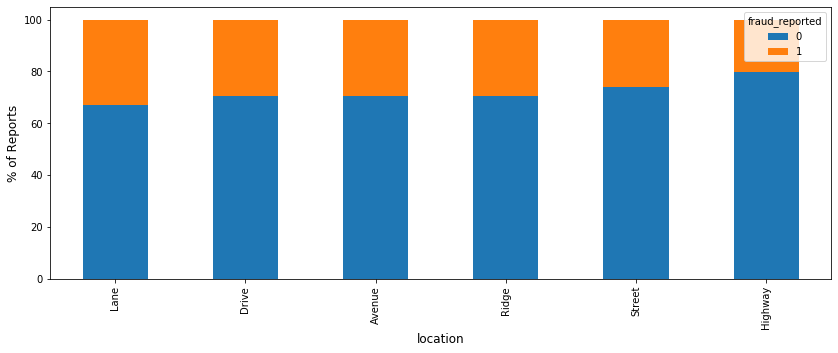

In [495]:
tbl=pd.crosstab(df1['location'], df1['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('location',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

Text(0, 0.5, '% of Reports')

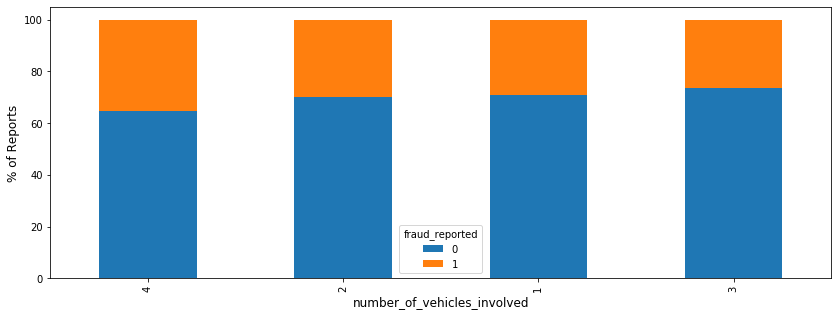

In [496]:
tbl=pd.crosstab(df1['number_of_vehicles_involved'], df1['fraud_reported'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('number_of_vehicles_involved',fontsize=12)
plt.ylabel('% of Reports',fontsize=12)

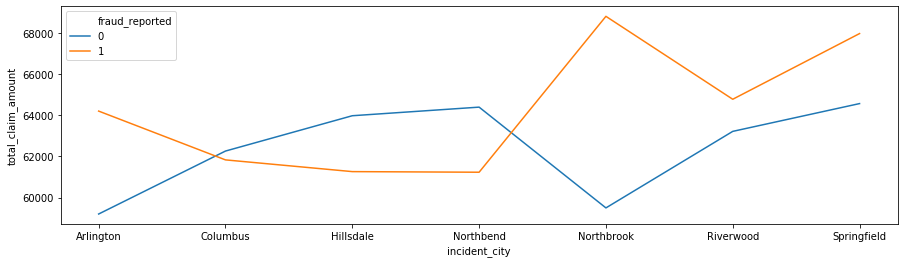

In [497]:
plt.figure(figsize=(15,4))
sns.lineplot(x='incident_city',y='total_claim_amount',hue='fraud_reported',data=df1, ci=None)

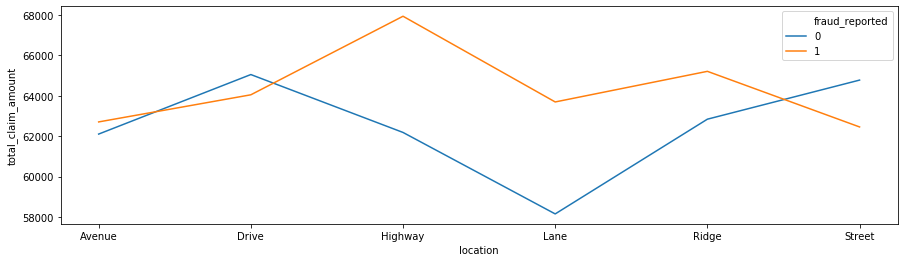

In [498]:
plt.figure(figsize=(15,4))
sns.lineplot(x='location',y='total_claim_amount',hue='fraud_reported',data=df1, ci=None)

### Converting Categorical to Numerical features

In [499]:
cat_new, num_new, other_new = [], [], []
for i in df1:
    if df1[i].dtype=='O':
        cat_new.append(i)
    elif (df1[i].dtypes=='int64') | (df1[i].dtypes=='float64'):
        num_new.append(i)
    else:
        other_new.append(i)
print('>>> Number of Categorical Features ::', len(cat_new))
print('>>> Number of Numerical Features ::', len(num_new))
print('>>> Number of Other Features ::', len(other_new))

>>> Number of Categorical Features :: 16
>>> Number of Numerical Features :: 19
>>> Number of Other Features :: 0


In [500]:
print('>>>> # of unique values in categorical features <<<<')
for i in df1[cat_new]:
    print(i, '--->', df1[i].nunique())

>>>> # of unique values in categorical features <<<<
policy_state ---> 3
policy_csl ---> 3
insured_sex ---> 2
insured_education_level ---> 7
insured_occupation ---> 14
insured_hobbies ---> 20
incident_type ---> 2
collision_type ---> 3
incident_severity ---> 3
authorities_contacted ---> 4
incident_city ---> 7
property_damage ---> 2
police_report_available ---> 2
auto_make ---> 14
auto_model ---> 39
location ---> 6


In [501]:
for i in df1[cat_new]:
    if df1[i].nunique()==2:
        print(i,'-->',df1[i].unique())
    else: continue

insured_sex --> ['MALE' 'FEMALE']
incident_type --> ['Single Vehicle Collision' 'Multi-vehicle Collision']
property_damage --> ['YES' 'NO']
police_report_available --> ['YES' 'NO']


In [502]:
le=LabelEncoder()
for i in ['insured_sex', 'incident_type', 'property_damage', 'police_report_available']:
    df1[i]=le.fit_transform(df1[i])

In [503]:
df1=pd.get_dummies(df1)
df1.columns

Index(['age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss',
       'incident_type', 'incident_hour_of_the_day',
       ...
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6', 'location_Avenue', 'location_Drive',
       'location_Highway', 'location_Lane', 'location_Ridge',
       'location_Street'],
      dtype='object', length=146)

In [504]:
# Splitting x and y from data
x=df1.drop(columns=['fraud_reported'], axis=1)
y=df1['fraud_reported']
print('Shape of x :: %s\nShape of y :: %s' %(x.shape, y.shape))

Shape of x :: (822, 145)
Shape of y :: (822,)


In [505]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [506]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(822, 10)

In [507]:
pd.DataFrame(x)

0         1         2         3         4         5         6  \
0   -0.787646 -1.053218 -0.534943 -2.601354  2.147452 -1.550013  0.782346   
1   -0.863386  0.897858  0.541744 -0.479195 -0.441530  1.166061 -1.882474   
2    2.615789  1.670041 -0.845577  0.110087 -1.692789 -2.079407 -0.565693   
3   -1.493574  0.729377 -1.569772 -1.439294  1.475224 -2.613453 -0.000104   
4   -1.403886  1.844209  0.266311  2.500407 -0.263849  0.430769 -0.833307   
..        ...       ...       ...       ...       ...       ...       ...   
817 -1.403706  0.153401  0.751126 -0.806373 -0.550366 -2.080385 -0.978716   
818  2.834346 -1.294613 -0.006001  1.894717  0.238500  0.772310  3.563574   
819  0.724821 -0.254981  0.457133 -1.232779 -1.548649 -1.788625 -0.651695   
820 -1.614090  1.672100 -1.447666  2.129554  0.835023  0.829232 -1.388355   
821 -0.395562 -0.714119 -2.663210 -0.901256  1.236781  0.834019  4.000655   

            7         8         9  
0    1.080092  0.852393  0.353838  
1    2.709193 -2.503244  0.324333  
2    0.963273 -2.294767 -0.372316  
3    1.964895  0.859302 -0.079880  
4   -0.077030 -0.217567  1.915266  
..        ...       ...       ...  
817  2.426416  3.099450 -0.241176  
818  0.880432 -0.286330 -1.141209  
819  0.534302  1.886771 -1.477128  
820  0.278808  0.989653 -1.372162  
821  0.022992  0.569451 -0.595142  

[822 rows x 10 columns]

### Machine Learning Algorithms

In [508]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (657, 10) | x_test.shape --> (165, 10) 
y_train.shape --> (657,) | y_test.shape --> (165,)


In [509]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [510]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [511]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [512]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 68.48
>>> Confusion Matrix: 
 [[110   4]
 [ 48   3]]
>>> Recall Score = 5.88
>>> Specificity = 96.49
>>> False Positive Rate = 3.51
>>> Precision Score = 42.86
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       114
           1       0.43      0.06      0.10        51

    accuracy                           0.68       165
   macro avg       0.56      0.51      0.46       165
weighted avg       0.61      0.68      0.59       165

############################## Gaussian NB ##############################
>>> Accuracy Score = 66.67
>>> Confusion Matrix: 
 [[107   7]
 [ 48   3]]
>>> Recall Score = 5.88
>>> Specificity = 93.86
>>> False Positive Rate = 6.14
>>> Precision Score = 30.00
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.80   

In [513]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
Bagging Classifier                 70.909091
Extra Trees Classifier             70.303030
Support Vector Machine             69.090909
Logistic Regression                68.484848
Random Forest Classifier           67.272727
Gradient Boosting Classifier       67.272727
Gaussian NB                        66.666667
XGB Classifier                     65.454545
KNeighbors Classifier              63.030303
Decision Tree Classifier           60.606061


Let's take the top 4 models and perform cross validation

In [514]:
new_models={'XGB Classifier':xgb,
            'Bagging Classifier':bgc,
            'Random Forest Classifier':rf,
            'Gradient Boosting Classifier':gbc
           }

In [515]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

XGB Classifier  >>> Completed
Bagging Classifier  >>> Completed
Random Forest Classifier  >>> Completed
Gradient Boosting Classifier  >>> Completed
[68.65967365967366, 69.26107226107227, 71.3939393939394, 70.33100233100234]


In [516]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

New Accuracy Score  Accuracy Score
XGB Classifier                         68.659674       65.454545
Bagging Classifier                     69.261072       70.909091
Random Forest Classifier               71.393939       67.272727
Gradient Boosting Classifier           70.331002       67.272727

We can see that we can achieve 73.36 accuracy using Random Forest Classifier.

## Hyperparameter Tuning

In [517]:
# Instantiating with default values
rf=RandomForestClassifier(random_state=42)

### GridSearchCV Hyperparameter Tuning

In [518]:
rf_param = {'n_estimators':range(50,251,50),
            'max_depth': range(5,16,2)
           }

b_rf=GridSearchCV(rf,rf_param)
b_rf.fit(x_train,y_train)
print('Random Forest Classifier >>>', b_rf.best_params_)

Random Forest Classifier >>> {'max_depth': 7, 'n_estimators': 50}


In [523]:
# Instantiating with new parameters
rf=RandomForestClassifier(random_state=42, n_estimators=50, max_depth=7)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('>>> Accuracy Score = %0.2f' %(score*100))

>>> Accuracy Score = 69.09


Conclusion:
    1. We achieved a better score using cross validation for Random Forest Classifier.
    2. By performing a gridsearch, we can further fine tune the model to get better results.
    3. Clearly, the model we are looking for is Random Forest Classifer.

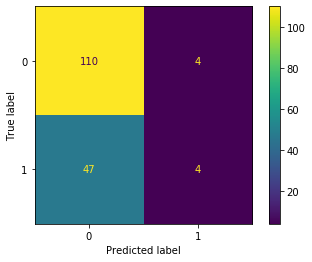

In [520]:
# Plotting Confusion Matrix
rf.fit(x_train,y_train)
plot_confusion_matrix(rf, x_test, y_test)

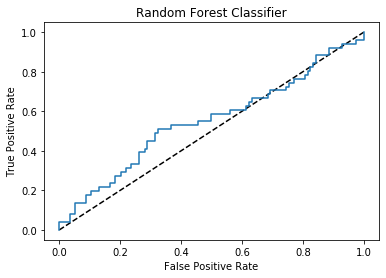

In [521]:
# Plotting ROC Curve for the model
y_pred_prob=rf.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [522]:
#Exporting model as pkl file
joblib.dump(rf,'RF_Auto_Insurance_Fraud.pkl')

['RF_Auto_Insurance_Fraud.pkl']